# RFE

In [ ]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Used for styling of graphs
!pip install SciencePlots

import scienceplots
plt.style.use(['science', 'grid', 'no-latex'])

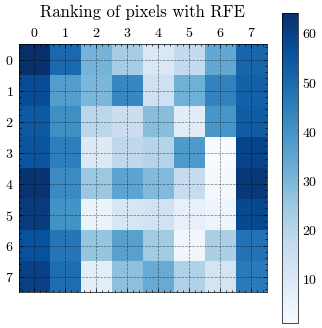

In [1]:
# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

In [ ]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
rfe.ranking_

array([64, 50, 31, 23, 10, 17, 34, 51, 57, 37, 30, 43, 14, 32, 44, 52, 54,
       41, 19, 15, 28,  8, 39, 53, 55, 45,  9, 18, 20, 38,  1, 59, 63, 42,
       25, 35, 29, 16,  2, 62, 61, 40,  5, 11, 13,  6,  4, 58, 56, 47, 26,
       36, 24,  3, 22, 48, 60, 49,  7, 27, 33, 21, 12, 46])

# cba to do example

In [ ]:
# reference: https://www.kaggle.com/code/mateuszk013/playground-series-s3e25-mohs-hardness#-5-%7C-Modelling-%E2%86%91

def remove_outliers(data, detector):
    if not isinstance(data, pd.DataFrame):
        raise TypeError(f"'data' must be {pd.DataFrame!r} instance")

    result = detector.fit_predict(data)
    outlier_ids = pd.Series(result == -1, index=data.index, dtype=bool)
    data_ids = pd.Series(np.ones_like(data.index), index=data.index, dtype=bool)

    return data[~(outlier_ids & data_ids)]



detector = make_pipeline(
    PowerTransformer(method="yeo-johnson", standardize=True),
    LocalOutlierFactor(),
)

reg = Regressor() # any regression model
kfold = KFold(n_splits=5, shuffle=True, random_state=42) # maybe lower depending on data
detector = make_pipeline(
    PowerTransformer(method="yeo-johnson", standardize=True),
    LocalOutlierFactor(),
)

hyperparameter = "localoutlierfactor__contamination"
hyperparameter_values = [None] + np.arange(0.01, 0.15, 0.01).tolist()
no_outliers_medae = {}

for k, (train_ids, valid_ids) in enumerate(kfold.split(X, y), start=1):
    X_train, y_train = X.iloc[train_ids], y.iloc[train_ids]
    X_valid, y_valid = X.iloc[valid_ids], y.iloc[valid_ids]

    lgbm.fit(X_train, y_train)
    default_medae = median_absolute_error(y_valid, reg.predict(X_valid))  # type:ignore

    for hp_value in hyperparameter_values:
        if hp_value is None:
            no_outliers_medae[f"0 - {k}"] = default_medae
            continue

        detector.set_params(**{hyperparameter: hp_value})
        X_no_outliers = remove_outliers(X_train, detector)
        y_no_outliers = y_train[X_no_outliers.index]

        reg.fit(X_no_outliers, y_no_outliers)
        clean_medae = median_absolute_error(y_valid, reg.predict(X_valid))  # type:ignore
        no_outliers_medae[f"{hp_value} - {k}"] = clean_medae